In [1]:
import numpy as np
from src.ShapeFunctions import EvaluateReferenceShapeFunctions
from Element import ReferenceElementCoordinates
import matplotlib.pyplot as plt
import scipy.optimize

In [24]:
# COMPUTATIONAL DOMAIN
Xmin = -1.5
Xmax = 3.5
Ymin = -2.5
Ymax = 1.5
Nx = 40
Ny = 40
xgrid = np.linspace(Xmin,Xmax,Nx)
ygrid = np.linspace(Ymin,Ymax,Ny)
X = np.zeros([Nx*Ny,2])
for ix in range(Nx):
    for iy in range(Ny):
        X[ix*Nx+iy,:] = [xgrid[ix],ygrid[iy]]

# LINEAR QUADRILATERAL
Xe = np.array([[-1,1],
               [2,1],
               [3,-1.5],
               [-0.5,-2]])

# QUADRILATERAL ELEMENT
ElType = 2    # ELEMENTAL TYPE
nedge = 4     # NUMBER OF ELEMENTAL SIDES
nHO = 3       # ELEMENTAL ORDER

# INTERFACE = CIRCLE OR RADI sqrt(12) CENTERED AT (-2,+2)
def f(r): 
    return (r[0]+2)**2+(r[1]-2)**2-12
interf = np.zeros([Nx*Ny])
for i in range(len(X[:,0])):
    interf[i] = f(X[i,:])
    

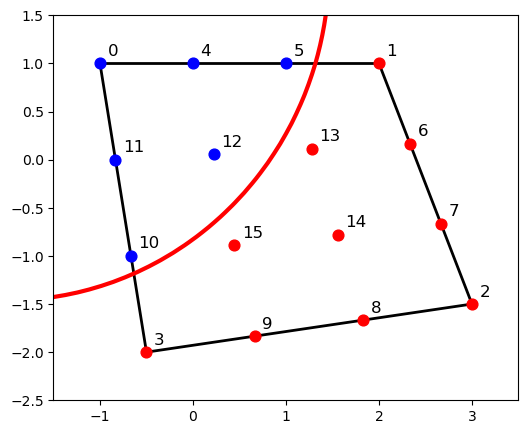

In [25]:
# MAKE IT HIGH-ORDER:
for i in range(nedge):
    # EDGE HIGH-ORDER NODES
    for k in range(1,nHO):
        HOnode = np.array([Xe[i,0]+((Xe[(i+1)%nedge,0]-Xe[i,0])/nHO)*k,Xe[i,1]+((Xe[(i+1)%nedge,1]-Xe[i,1])/nHO)*k])
        Xe = np.concatenate((Xe,HOnode.reshape((1,2))), axis=0)
# INTERIOR HIGH-ORDER NODES:
if nHO == 2:
    HOnode = np.array([np.mean(Xe[:nedge,0]),np.mean(Xe[:nedge,1])])
    Xe = np.concatenate((Xe,HOnode.reshape((1,2))), axis=0)
elif nHO == 3:
    for k in range(1,nHO):
        dx = (Xe[12-k,0]-Xe[5+k,0])/nHO
        dy = (Xe[12-k,1]-Xe[5+k,1])/nHO
        for j in range(1,nHO):
            if k == 1:
                HOnode = Xe[11,:] - np.array([dx*j,dy*j])
            elif k == 2:
                HOnode = Xe[7,:] + np.array([dx*j,dy*j])
            Xe = np.concatenate((Xe,HOnode.reshape((1,2))), axis=0)

# GIVE LEVEL-SET VALUES TO THE NODES 
PHIe = np.zeros([len(Xe[:,0])])
for i in range(len(Xe[:,0])):
    PHIe[i] = f(Xe[i,:])

fig, axs = plt.subplots(1, 1, figsize=(6,5))
# PLOT ELEMENT EDGES
for iedge in range(nedge):
    axs.plot([Xe[iedge,0],Xe[int((iedge+1)%nedge),0]],[Xe[iedge,1],Xe[int((iedge+1)%nedge),1]], color='k', linewidth=2)
# PLOT NODES WITH NEGATIVE OR POSITIVE LEVEL-SET VALUES
for inode in range(len(Xe[:,0])):
    if PHIe[inode] < 0:
        cl = 'blue'
    else:
        cl = 'red'
    axs.scatter(Xe[inode,0],Xe[inode,1],s=60,color=cl,zorder=7)
for inode in range(len(Xe[:,0])):
    axs.text(Xe[inode,0]+0.08,Xe[inode,1]+0.08,str(inode),fontsize=12)
# PLOT INTERFACE
axs.tricontour(X[:,0],X[:,1],interf,levels=[0],colors='red', linewidths=3)
plt.show()

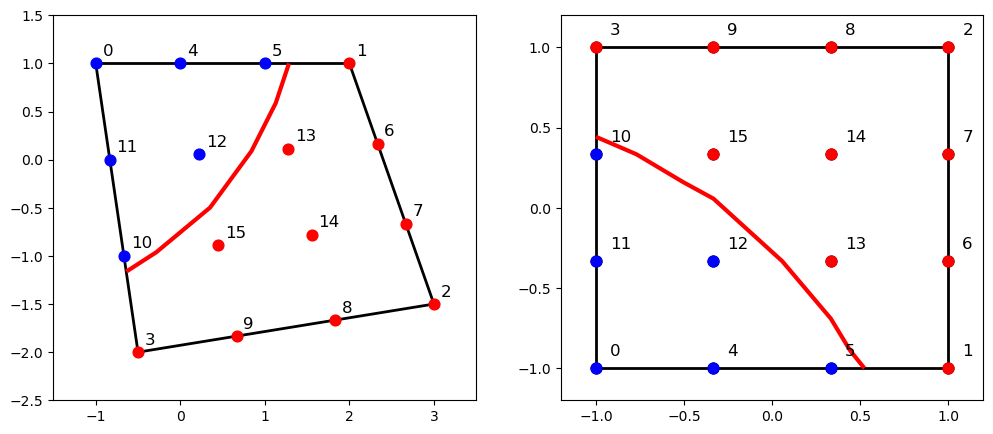

In [26]:
# OBTAIN REFERENCE ELEMENT COORDINATES
XIe = ReferenceElementCoordinates(ElType,nHO)
XminREF = -1.2
XmaxREF = 1.2
YminREF = -1.2
YmaxREF = 1.2

# REPRESENTING LEVEL-SET USING ONLY NODAL VALUES
fig, axs = plt.subplots(1, 2, figsize=(12,5))
#### LEFT PLOT: PHYSICAL SPACE
# PLOT ELEMENT EDGES
for iedge in range(nedge):
    axs[0].plot([Xe[iedge,0],Xe[int((iedge+1)%nedge),0]],[Xe[iedge,1],Xe[int((iedge+1)%nedge),1]], color='k', linewidth=2)
# PLOT NODES WITH NEGATIVE OR POSITIVE LEVEL-SET VALUES
for inode in range(len(Xe[:,0])):
    if PHIe[inode] < 0:
        cl = 'blue'
    else:
        cl = 'red'
    axs[0].scatter(Xe[inode,0],Xe[inode,1],s=60,color=cl,zorder=7)
for inode in range(len(Xe[:,0])):
    axs[0].text(Xe[inode,0]+0.08,Xe[inode,1]+0.08,str(inode),fontsize=12)
# PLOT INTERFACE
axs[0].tricontour(Xe[:,0],Xe[:,1],PHIe,levels=[0],colors='red', linewidths=3)
axs[0].set_ylim([Ymin,Ymax])
axs[0].set_xlim([Xmin,Xmax])

#### RIGHT PLOT: REFERENCE SPACE
# PLOT ELEMENT EDGES
for iedge in range(nedge):
    axs[1].plot([XIe[iedge,0],XIe[int((iedge+1)%nedge),0]],[XIe[iedge,1],XIe[int((iedge+1)%nedge),1]], color='k', linewidth=2)
for inode in range(len(XIe[:,0])):
    axs[1].scatter(XIe[inode,0],XIe[inode,1],s=60,color='k',zorder=7)
# PLOT NODES WITH NEGATIVE OR POSITIVE LEVEL-SET VALUES
for inode in range(len(XIe[:,0])):
    if PHIe[inode] < 0:
        cl = 'blue'
    else:
        cl = 'red'
    axs[1].scatter(XIe[inode,0],XIe[inode,1],s=60,color=cl,zorder=7)
for inode in range(len(XIe[:,0])):
    axs[1].text(XIe[inode,0]+0.08,XIe[inode,1]+0.08,str(inode),fontsize=12)
# PLOT INTERFACE
axs[1].tricontour(XIe[:,0],XIe[:,1],PHIe,levels=[0],colors='red', linewidths=3)
axs[1].set_ylim([YminREF,YmaxREF])
axs[1].set_xlim([XminREF,XmaxREF])
plt.show()


/tmp/ipykernel_1501236/1806790154.py:41: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  XIeint[k,:] = [sol.x, edgeconstraint(sol.x)]
/tmp/ipykernel_1501236/1806790154.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([xi,eta]).reshape((1,2))
/tmp/ipykernel_1501236/1806790154.py:26: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise th

True
[ 0.14354109 -0.40004187 -0.36693606  0.10992278]


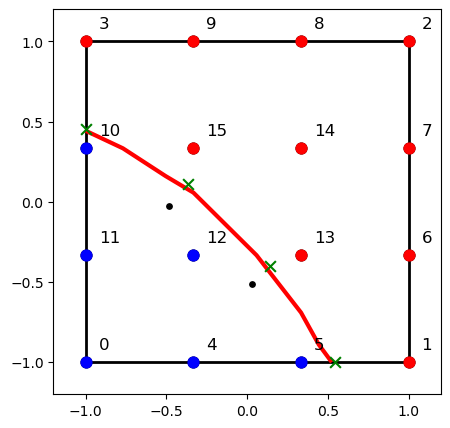

In [27]:
# FIND POINTS ON INTERFACE USING ELEMENTAL INTERPOLATION
#### INTERSECTION WITH EDGES
XIeint = np.zeros([2,2])
k = 0
for i in range(nedge):  # Loop over elemental edges
    # Check for sign change along the edge
    inode = i
    jnode = (i + 1) % nedge
    if PHIe[inode] * PHIe[jnode] < 0:
        # IDENTIFY WHICH NODES ARE ON THE INTERSECTED EDGE
        nodes = np.zeros([2+nHO-1], dtype=int)
        nodes[:2] = [inode, jnode]
        for knode in range(nHO-1):
            nodes[2+knode] = jnode+(nHO-1)*(nedge-1)+knode
            
        if abs(XIe[jnode,0]-XIe[inode,0]) < 1e-6: # VERTICAL EDGE
            #### DEFINE CONSTRAINT PHI FUNCTION
            xi = XIe[inode,0]
            def PHIedge(eta):
                X = np.array([xi,eta]).reshape((1,2))
                N, foo, foo = EvaluateReferenceShapeFunctions(X, ElType, nHO, len(XIe[:,0]))
                return N@PHIe
            #### FIND INTERSECTION POINT:
            Eta0 = 0  # INITIAL GUESS FOR ROOT SOLVER
            sol = scipy.optimize.root(PHIedge, Eta0)
            XIeint[k,:] = [xi, sol.x]
            k += 1
        else:
            def edgeconstraint(xi):
                # FUNCTION DEFINING THE CONSTRAINT ON THE ELEMENTAL EDGE
                m = (XIe[jnode,1]-XIe[inode,1])/(XIe[jnode,0]-XIe[inode,0])
                eta = m*(xi-XIe[inode,0])+XIe[inode,1]
                return eta
            def PHIedge(xi):
                X = np.array([xi,edgeconstraint(xi)]).reshape((1,2))
                N, foo, foo = EvaluateReferenceShapeFunctions(X, ElType, nHO, len(XIe[:,0]))
                return N@PHIe
            #### FIND INTERSECTION POINT:
            Xi0 = 0  # INITIAL GUESS FOR ROOT SOLVER
            sol = scipy.optimize.root(PHIedge, Xi0)
            XIeint[k,:] = [sol.x, edgeconstraint(sol.x)]
            k += 1
        
#### HIGH-ORDER INTERFACE NODES
# IN THIS CASE, WITH USE THE REGULARITY OF THE REFERENCE TRIANGLE TO FIND THE NODES
# LYING ON THE INTERFACE INSIDE THE ELEMENT. SIMILARLY TO THE INTERSECTION NODES ON THE
# ELEMENTAL EDGES, EACH INTERIOR NODE CAN BE FOUND BY IMPOSING TWO CONDITIONS:
#    - PHI = 0
#    - NODE ON LINE DIVIDING THE 
def PHI(X):
    N, foo, foo = EvaluateReferenceShapeFunctions(X, ElType, nHO, len(XIe[:,0]))
    return N@PHIe

def fun(X):
    F = np.zeros([X.shape[0]])
    # SEPARATE GUESS VECTOR INTO INDIVIDUAL NODAL COORDINATES
    XHO = X.reshape((nHO-1,2)) 
    # PHI = 0 ON NODES
    for inode in range(nHO-1):
        F[inode] = PHI(XHO[inode,:].reshape((1,2)))
    # EQUAL DISTANCES BETWEEN INTERFACE NODES
    if nHO == 2:
        F[-1] = np.linalg.norm(XIeint[0,:]-X)-np.linalg.norm(XIeint[1,:]-X)
    if nHO == 3:
        #### FIRST INTERVAL
        F[nHO-1] = np.linalg.norm(XIeint[0,:]-XHO[0,:])-np.linalg.norm(XHO[0,:]-XHO[1,:])
        #### LAST INTERVAL
        F[-1] = np.linalg.norm(XIeint[1,:]-XHO[-1,:])-np.linalg.norm(XHO[-1,:]-XHO[-2,:])
    #### INTERIOR INTERVALS
    if nHO > 3:
        for intv in range(nHO-3):
            F[nHO+intv] = np.linalg.norm(XHO[intv+1,:]-XHO[intv+2,:]) - np.linalg.norm(XHO[intv+2,:]-XHO[intv+3,:])
        
    return F

# PREPARE INITIAL GUESS
X0 = np.zeros([(nHO-1)*2])
for inode in range(1,nHO):
    X0[2*(inode-1):2*inode] = XIeint[0,:] + np.array([(XIeint[1,0]-XIeint[0,0]),(XIeint[1,1]-XIeint[0,1])])*inode/nHO
X0 = X0.reshape((1,(nHO-1)*2))
# COMPUTE HIGH-ORDER INTERFACE NODES COORDINATES
sol = scipy.optimize.root(fun, X0)
print(sol.success)
print(sol.x)
# STORE SOLUTION NODES
XintINT = np.zeros([nHO-1,2])
for inode in range(nHO-1):
    XintINT[inode,:] = np.reshape(sol.x, (nHO-1,2))[inode,:]

# CONCATENATE INTERFACE NODES
XIeintHO = np.concatenate((XIeint,XintINT),axis=0)
   
# REPRESENTING LEVEL-SET USING ONLY NODAL VALUES
fig, axs = plt.subplots(1, 1, figsize=(5,5))
# PLOT ELEMENT EDGES
for iedge in range(nedge):
    axs.plot([XIe[iedge,0],XIe[int((iedge+1)%nedge),0]],[XIe[iedge,1],XIe[int((iedge+1)%nedge),1]], color='k', linewidth=2)
for inode in range(len(XIe[:,0])):
    axs.scatter(XIe[inode,0],XIe[inode,1],s=60,color='k',zorder=7)
# PLOT NODES WITH NEGATIVE OR POSITIVE LEVEL-SET VALUES
for inode in range(len(XIe[:,0])):
    if PHIe[inode] < 0:
        cl = 'blue'
    else:
        cl = 'red'
    axs.scatter(XIe[inode,0],XIe[inode,1],s=60,color=cl,zorder=7)
for inode in range(len(XIe[:,0])):
    axs.text(XIe[inode,0]+0.08,XIe[inode,1]+0.08,str(inode),fontsize=12)
# PLOT INTERFACE
axs.tricontour(XIe[:,0],XIe[:,1],PHIe,levels=[0],colors='red', linewidths=3)
# PLOT INITIAL GUESS COORDINATES
axs.scatter(X0.reshape((nHO-1,2))[:,0],X0.reshape((nHO-1,2))[:,1],s=60,marker='.', color='k',zorder = 7)
# PLOT INTERSECTION POINTS
axs.scatter(XIeintHO[:,0],XIeintHO[:,1],s=60,marker='x',color='green',zorder=7)
axs.set_ylim([YminREF,YmaxREF])
axs.set_xlim([XminREF,XmaxREF])
plt.show()

(-1.5, 3.5)

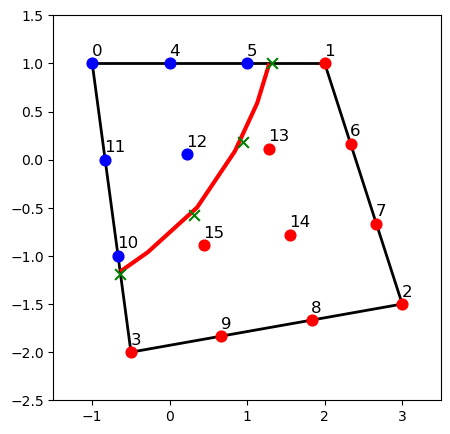

In [28]:
# MAP BACK TO PHYSICAL SPACE
#### EVALUATE REFERENCE SHAPE FUNCTIONS AT POINTS TO MAP (INTERFACE NODES)
Nint, foo, foo = EvaluateReferenceShapeFunctions(XIeintHO, ElType, nHO, len(XIe[:,0]))
XintHO = Nint@Xe

# REPRESENTING LEVEL-SET USING ONLY NODAL VALUES
fig, axs = plt.subplots(1, 1, figsize=(5,5))
#### LEFT PLOT: PHYSICAL SPACE
# PLOT ELEMENT EDGES
for iedge in range(nedge):
    axs.plot([Xe[iedge,0],Xe[int((iedge+1)%nedge),0]],[Xe[iedge,1],Xe[int((iedge+1)%nedge),1]], color='k', linewidth=2)
# PLOT NODES WITH NEGATIVE OR POSITIVE LEVEL-SET VALUES
for inode in range(len(Xe[:,0])):
    if PHIe[inode] < 0:
        cl = 'blue'
    else:
        cl = 'red'
    axs.scatter(Xe[inode,0],Xe[inode,1],s=60,color=cl,zorder=7)
for inode in range(len(Xe[:,0])):
    axs.text(Xe[inode,0]-0.01,Xe[inode,1]+0.08,str(inode),fontsize=12)
# PLOT INTERFACE
axs.tricontour(Xe[:,0],Xe[:,1],PHIe,levels=[0],colors='red', linewidths=3)
# PLOT INTERSECTION POINTS
axs.scatter(XintHO[:,0],XintHO[:,1],s=60,marker='x',color='green',zorder=7)
axs.set_ylim([Ymin,Ymax])
axs.set_xlim([Xmin,Xmax])

WE CHECK THE PROCEDURE FOR A DIFFERENT INTERFACE CUTTING CASE 

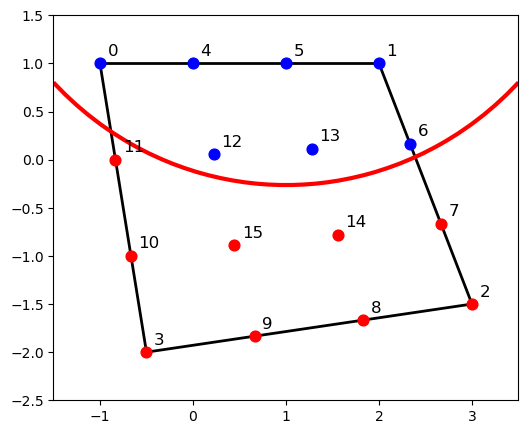

In [29]:
# COMPUTATIONAL DOMAIN
Xmin = -1.5
Xmax = 3.5
Ymin = -2.5
Ymax = 1.5
Nx = 40
Ny = 40
xgrid = np.linspace(Xmin,Xmax,Nx)
ygrid = np.linspace(Ymin,Ymax,Ny)
X = np.zeros([Nx*Ny,2])
for ix in range(Nx):
    for iy in range(Ny):
        X[ix*Nx+iy,:] = [xgrid[ix],ygrid[iy]]

# LINEAR QUADRILATERAL
Xe = np.array([[-1,1],
               [2,1],
               [3,-1.5],
               [-0.5,-2]])

# QUADRILATERAL ELEMENT
ElType = 2  
nedge = 4  
nHO = 3

# MAKE IT HIGH-ORDER:
for i in range(nedge):
    # EDGE HIGH-ORDER NODES
    for k in range(1,nHO):
        HOnode = np.array([Xe[i,0]+((Xe[(i+1)%nedge,0]-Xe[i,0])/nHO)*k,Xe[i,1]+((Xe[(i+1)%nedge,1]-Xe[i,1])/nHO)*k])
        Xe = np.concatenate((Xe,HOnode.reshape((1,2))), axis=0)
# INTERIOR HIGH-ORDER NODES:
if nHO == 2:
    HOnode = np.array([np.mean(Xe[:nedge,0]),np.mean(Xe[:nedge,1])])
    Xe = np.concatenate((Xe,HOnode.reshape((1,2))), axis=0)
elif nHO == 3:
    for k in range(1,nHO):
        dx = (Xe[12-k,0]-Xe[5+k,0])/nHO
        dy = (Xe[12-k,1]-Xe[5+k,1])/nHO
        for j in range(1,nHO):
            if k == 1:
                HOnode = Xe[11,:] - np.array([dx*j,dy*j])
            elif k == 2:
                HOnode = Xe[7,:] + np.array([dx*j,dy*j])
            Xe = np.concatenate((Xe,HOnode.reshape((1,2))), axis=0)
    
# INTERFACE = CIRCLE OR RADI sqrt(12) CENTERED AT (+1,+3.2)
def f(r): 
    return (r[0]-1)**2+(r[1]-3.2)**2-12
interf = np.zeros([Nx*Ny])
for i in range(len(X[:,0])):
    interf[i] = f(X[i,:])
    
# GIVE LEVEL-SET VALUES TO THE NODES 
PHIe = np.zeros([len(Xe[:,0])])
for i in range(len(Xe[:,0])):
    PHIe[i] = f(Xe[i,:])

fig, axs = plt.subplots(1, 1, figsize=(6,5))
# PLOT ELEMENT EDGES
for iedge in range(nedge):
    axs.plot([Xe[iedge,0],Xe[int((iedge+1)%nedge),0]],[Xe[iedge,1],Xe[int((iedge+1)%nedge),1]], color='k', linewidth=2)
# PLOT NODES WITH NEGATIVE OR POSITIVE LEVEL-SET VALUES
for inode in range(len(Xe[:,0])):
    if PHIe[inode] < 0:
        cl = 'blue'
    else:
        cl = 'red'
    axs.scatter(Xe[inode,0],Xe[inode,1],s=60,color=cl,zorder=7)
for inode in range(len(Xe[:,0])):
    axs.text(Xe[inode,0]+0.08,Xe[inode,1]+0.08,str(inode),fontsize=12)
# PLOT INTERFACE
axs.tricontour(X[:,0],X[:,1],interf,levels=[0],colors='red', linewidths=3)
plt.show()

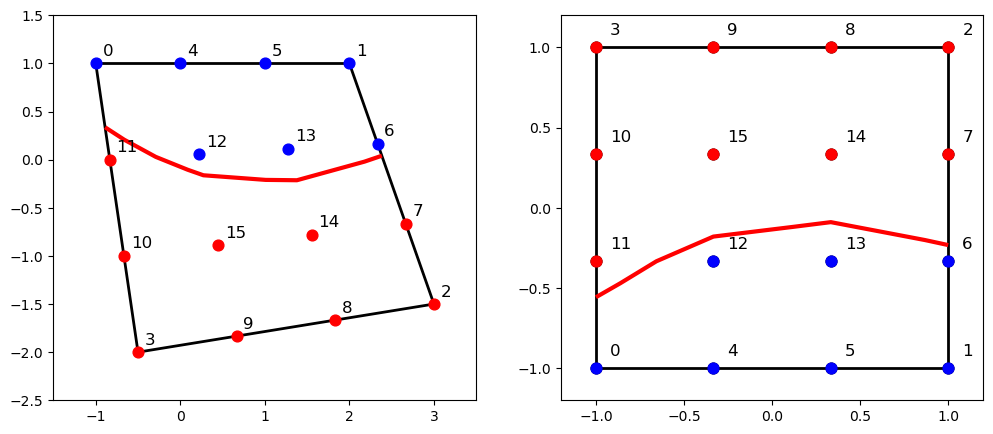

In [30]:
# OBTAIN REFERENCE ELEMENT COORDINATES
XIe = ReferenceElementCoordinates(ElType,nHO)
XminREF = -1.2
XmaxREF = 1.2
YminREF = -1.2
YmaxREF = 1.2

# REPRESENTING LEVEL-SET USING ONLY NODAL VALUES
fig, axs = plt.subplots(1, 2, figsize=(12,5))
#### LEFT PLOT: PHYSICAL SPACE
# PLOT ELEMENT EDGES
for iedge in range(nedge):
    axs[0].plot([Xe[iedge,0],Xe[int((iedge+1)%nedge),0]],[Xe[iedge,1],Xe[int((iedge+1)%nedge),1]], color='k', linewidth=2)
# PLOT NODES WITH NEGATIVE OR POSITIVE LEVEL-SET VALUES
for inode in range(len(Xe[:,0])):
    if PHIe[inode] < 0:
        cl = 'blue'
    else:
        cl = 'red'
    axs[0].scatter(Xe[inode,0],Xe[inode,1],s=60,color=cl,zorder=7)
for inode in range(len(Xe[:,0])):
    axs[0].text(Xe[inode,0]+0.08,Xe[inode,1]+0.08,str(inode),fontsize=12)
# PLOT INTERFACE
axs[0].tricontour(Xe[:,0],Xe[:,1],PHIe,levels=[0],colors='red', linewidths=3)
axs[0].set_ylim([Ymin,Ymax])
axs[0].set_xlim([Xmin,Xmax])

#### RIGHT PLOT: REFERENCE SPACE
# PLOT ELEMENT EDGES
for iedge in range(nedge):
    axs[1].plot([XIe[iedge,0],XIe[int((iedge+1)%nedge),0]],[XIe[iedge,1],XIe[int((iedge+1)%nedge),1]], color='k', linewidth=2)
for inode in range(len(XIe[:,0])):
    axs[1].scatter(XIe[inode,0],XIe[inode,1],s=60,color='k',zorder=7)
# PLOT NODES WITH NEGATIVE OR POSITIVE LEVEL-SET VALUES
for inode in range(len(XIe[:,0])):
    if PHIe[inode] < 0:
        cl = 'blue'
    else:
        cl = 'red'
    axs[1].scatter(XIe[inode,0],XIe[inode,1],s=60,color=cl,zorder=7)
for inode in range(len(XIe[:,0])):
    axs[1].text(XIe[inode,0]+0.08,XIe[inode,1]+0.08,str(inode),fontsize=12)
# PLOT INTERFACE
axs[1].tricontour(XIe[:,0],XIe[:,1],PHIe,levels=[0],colors='red', linewidths=3)
axs[1].set_ylim([YminREF,YmaxREF])
axs[1].set_xlim([XminREF,XmaxREF])
plt.show()

/tmp/ipykernel_1501236/1806790154.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([xi,eta]).reshape((1,2))
/tmp/ipykernel_1501236/1806790154.py:26: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  XIeint[k,:] = [xi, sol.x]


True
[ 0.31103852 -0.06736365 -0.38597276 -0.17943278]


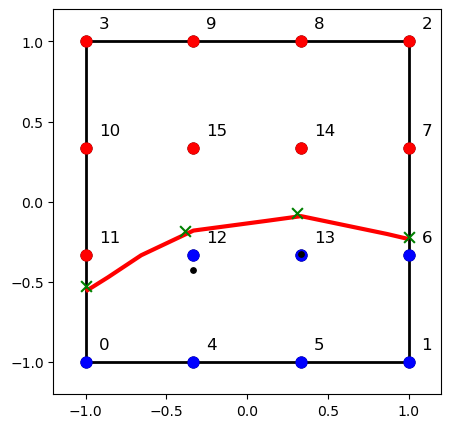

In [31]:
# FIND POINTS ON INTERFACE USING ELEMENTAL INTERPOLATION
#### INTERSECTION WITH EDGES
XIeint = np.zeros([2,2])
k = 0
for i in range(nedge):  # Loop over elemental edges
    # Check for sign change along the edge
    inode = i
    jnode = (i + 1) % nedge
    if PHIe[inode] * PHIe[jnode] < 0:
        # IDENTIFY WHICH NODES ARE ON THE INTERSECTED EDGE
        nodes = np.zeros([2+nHO-1], dtype=int)
        nodes[:2] = [inode, jnode]
        for knode in range(nHO-1):
            nodes[2+knode] = jnode+(nHO-1)*(nedge-1)+knode
            
        if abs(XIe[jnode,0]-XIe[inode,0]) < 1e-6: # VERTICAL EDGE
            #### DEFINE CONSTRAINT PHI FUNCTION
            xi = XIe[inode,0]
            def PHIedge(eta):
                X = np.array([xi,eta]).reshape((1,2))
                N, foo, foo = EvaluateReferenceShapeFunctions(X, ElType, nHO, len(XIe[:,0]))
                return N@PHIe
            #### FIND INTERSECTION POINT:
            Eta0 = 0  # INITIAL GUESS FOR ROOT SOLVER
            sol = scipy.optimize.root(PHIedge, Eta0)
            XIeint[k,:] = [xi, sol.x]
            k += 1
        else:
            def edgeconstraint(xi):
                # FUNCTION DEFINING THE CONSTRAINT ON THE ELEMENTAL EDGE
                m = (XIe[jnode,1]-XIe[inode,1])/(XIe[jnode,0]-XIe[inode,0])
                eta = m*(xi-XIe[inode,0])+XIe[inode,1]
                return eta
            def PHIedge(xi):
                X = np.array([xi,edgeconstraint(xi)]).reshape((1,2))
                N, foo, foo = EvaluateReferenceShapeFunctions(X, ElType, nHO, len(XIe[:,0]))
                return N@PHIe
            #### FIND INTERSECTION POINT:
            Xi0 = 0  # INITIAL GUESS FOR ROOT SOLVER
            sol = scipy.optimize.root(PHIedge, Xi0)
            XIeint[k,:] = [sol.x, edgeconstraint(sol.x)]
            k += 1
        
#### HIGH-ORDER INTERFACE NODES
# IN THIS CASE, WITH USE THE REGULARITY OF THE REFERENCE TRIANGLE TO FIND THE NODES
# LYING ON THE INTERFACE INSIDE THE ELEMENT. SIMILARLY TO THE INTERSECTION NODES ON THE
# ELEMENTAL EDGES, EACH INTERIOR NODE CAN BE FOUND BY IMPOSING TWO CONDITIONS:
#    - PHI = 0
#    - NODE ON LINE DIVIDING THE 
def PHI(X):
    N, foo, foo = EvaluateReferenceShapeFunctions(X, ElType, nHO, len(XIe[:,0]))
    return N@PHIe

def fun(X):
    F = np.zeros([X.shape[0]])
    # SEPARATE GUESS VECTOR INTO INDIVIDUAL NODAL COORDINATES
    XHO = X.reshape((nHO-1,2)) 
    # PHI = 0 ON NODES
    for inode in range(nHO-1):
        F[inode] = PHI(XHO[inode,:].reshape((1,2)))
    # EQUAL DISTANCES BETWEEN INTERFACE NODES
    if nHO == 2:
        F[-1] = np.linalg.norm(XIeint[0,:]-X)-np.linalg.norm(XIeint[1,:]-X)
    if nHO == 3:
        #### FIRST INTERVAL
        F[nHO-1] = np.linalg.norm(XIeint[0,:]-XHO[0,:])-np.linalg.norm(XHO[0,:]-XHO[1,:])
        #### LAST INTERVAL
        F[-1] = np.linalg.norm(XIeint[1,:]-XHO[-1,:])-np.linalg.norm(XHO[-1,:]-XHO[-2,:])
    #### INTERIOR INTERVALS
    if nHO > 3:
        for intv in range(nHO-3):
            F[nHO+intv] = np.linalg.norm(XHO[intv+1,:]-XHO[intv+2,:]) - np.linalg.norm(XHO[intv+2,:]-XHO[intv+3,:])
        
    return F

# PREPARE INITIAL GUESS
X0 = np.zeros([(nHO-1)*2])
for inode in range(1,nHO):
    X0[2*(inode-1):2*inode] = XIeint[0,:] + np.array([(XIeint[1,0]-XIeint[0,0]),(XIeint[1,1]-XIeint[0,1])])*inode/nHO
X0 = X0.reshape((1,(nHO-1)*2))
# COMPUTE HIGH-ORDER INTERFACE NODES COORDINATES
sol = scipy.optimize.root(fun, X0)
print(sol.success)
print(sol.x)
# STORE SOLUTION NODES
XintINT = np.zeros([nHO-1,2])
for inode in range(nHO-1):
    XintINT[inode,:] = np.reshape(sol.x, (nHO-1,2))[inode,:]

# CONCATENATE INTERFACE NODES
XIeintHO = np.concatenate((XIeint,XintINT),axis=0)
   
# REPRESENTING LEVEL-SET USING ONLY NODAL VALUES
fig, axs = plt.subplots(1, 1, figsize=(5,5))
# PLOT ELEMENT EDGES
for iedge in range(nedge):
    axs.plot([XIe[iedge,0],XIe[int((iedge+1)%nedge),0]],[XIe[iedge,1],XIe[int((iedge+1)%nedge),1]], color='k', linewidth=2)
for inode in range(len(XIe[:,0])):
    axs.scatter(XIe[inode,0],XIe[inode,1],s=60,color='k',zorder=7)
# PLOT NODES WITH NEGATIVE OR POSITIVE LEVEL-SET VALUES
for inode in range(len(XIe[:,0])):
    if PHIe[inode] < 0:
        cl = 'blue'
    else:
        cl = 'red'
    axs.scatter(XIe[inode,0],XIe[inode,1],s=60,color=cl,zorder=7)
for inode in range(len(XIe[:,0])):
    axs.text(XIe[inode,0]+0.08,XIe[inode,1]+0.08,str(inode),fontsize=12)
# PLOT INTERFACE
axs.tricontour(XIe[:,0],XIe[:,1],PHIe,levels=[0],colors='red', linewidths=3)
# PLOT INITIAL GUESS COORDINATES
axs.scatter(X0.reshape((nHO-1,2))[:,0],X0.reshape((nHO-1,2))[:,1],s=60,marker='.', color='k',zorder = 7)
# PLOT INTERSECTION POINTS
axs.scatter(XIeintHO[:,0],XIeintHO[:,1],s=60,marker='x',color='green',zorder=7)
axs.set_ylim([YminREF,YmaxREF])
axs.set_xlim([XminREF,XmaxREF])
plt.show()

(-1.5, 3.5)

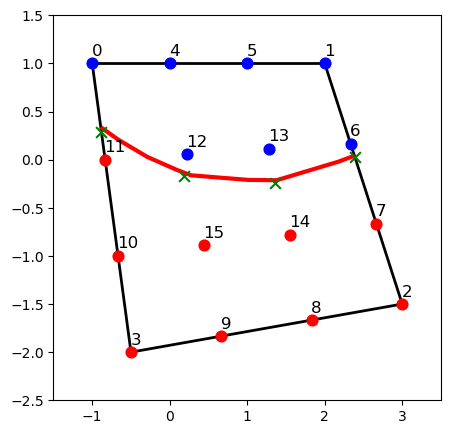

In [32]:
# MAP BACK TO PHYSICAL SPACE
#### EVALUATE REFERENCE SHAPE FUNCTIONS AT POINTS TO MAP (INTERFACE NODES)
Nint, foo, foo = EvaluateReferenceShapeFunctions(XIeintHO, ElType, nHO, len(XIe[:,0]))
XintHO = Nint@Xe

# REPRESENTING LEVEL-SET USING ONLY NODAL VALUES
fig, axs = plt.subplots(1, 1, figsize=(5,5))
#### LEFT PLOT: PHYSICAL SPACE
# PLOT ELEMENT EDGES
for iedge in range(nedge):
    axs.plot([Xe[iedge,0],Xe[int((iedge+1)%nedge),0]],[Xe[iedge,1],Xe[int((iedge+1)%nedge),1]], color='k', linewidth=2)
# PLOT NODES WITH NEGATIVE OR POSITIVE LEVEL-SET VALUES
for inode in range(len(Xe[:,0])):
    if PHIe[inode] < 0:
        cl = 'blue'
    else:
        cl = 'red'
    axs.scatter(Xe[inode,0],Xe[inode,1],s=60,color=cl,zorder=7)
for inode in range(len(Xe[:,0])):
    axs.text(Xe[inode,0]-0.01,Xe[inode,1]+0.08,str(inode),fontsize=12)
# PLOT INTERFACE
axs.tricontour(Xe[:,0],Xe[:,1],PHIe,levels=[0],colors='red', linewidths=3)
# PLOT INTERSECTION POINTS
axs.scatter(XintHO[:,0],XintHO[:,1],s=60,marker='x',color='green',zorder=7)
axs.set_ylim([Ymin,Ymax])
axs.set_xlim([Xmin,Xmax])